In [3]:
import os
import pickle
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [5]:
# Step 1: Define Dataset Path and Labels
DATA_DIR = r"gestures_1"
class_labels = [chr(i) for i in range(65, 91)]  # A-Z labels
max_landmarks = 21  # Mediapipe hand landmarks

In [7]:
# Step 2: Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [9]:
# Step 3: Load and Process Dataset
data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    class_label = dir_  # Folder name is class label
    class_dir = os.path.join(DATA_DIR, dir_)

    if not os.path.isdir(class_dir):
        continue

    for img_path in os.listdir(class_dir):
        if not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img = cv2.imread(os.path.join(class_dir, img_path))
        if img is None:
            print(f"Skipping invalid image: {img_path}")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            data_aux = []
            x_ = []
            y_ = []

            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    x_.append(lm.x)
                    y_.append(lm.y)

                for lm in hand_landmarks.landmark:
                    data_aux.append(lm.x - min(x_))
                    data_aux.append(lm.y - min(y_))

            # Padding or trimming to max_landmarks * 2
            data_aux = data_aux[:max_landmarks * 2] + [0] * (max_landmarks * 2 - len(data_aux))
            data.append(data_aux)
            labels.append(class_label)

In [11]:
# Step 4: Save Processed Data as Pickle
with open('data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)

# Step 5: Load and Prepare Data for Training
with open('data.pickle', 'rb') as f:
    dataset = pickle.load(f)

data = np.array(dataset['data'])
labels = np.array(dataset['labels'])

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
data = data.reshape(-1, data.shape[1], 1, 1, 1)
data = data.astype('float32') / np.max(data)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [13]:
# Step 6: Build and Train the Model
model = Sequential([
    Conv3D(32, kernel_size=(3, 1, 1), activation='relu', input_shape=(data.shape[1], 1, 1, 1)),
    MaxPooling3D(pool_size=(2, 1, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(lb.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

model.save('sign_language_mode.keras')

Epoch 1/200


C:\Users\nandh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1537 - loss: 3.0853 - val_accuracy: 0.3102 - val_loss: 2.6829
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3271 - loss: 2.5688 - val_accuracy: 0.5438 - val_loss: 2.1879
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4952 - loss: 2.0972 - val_accuracy: 0.5292 - val_loss: 1.7390
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5655 - loss: 1.6931 - val_accuracy: 0.6898 - val_loss: 1.4004
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6548 - loss: 1.3561 - val_accuracy: 0.7518 - val_loss: 1.1638
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7426 - loss: 1.1496 - val_accuracy: 0.7591 - val_loss: 0.9705
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8073 - loss: 0.9028 - val_accuracy: 0.8175 - val_loss: 0.8281
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8084 - loss: 0.8672 - val_accuracy: 0.8467 - val_l

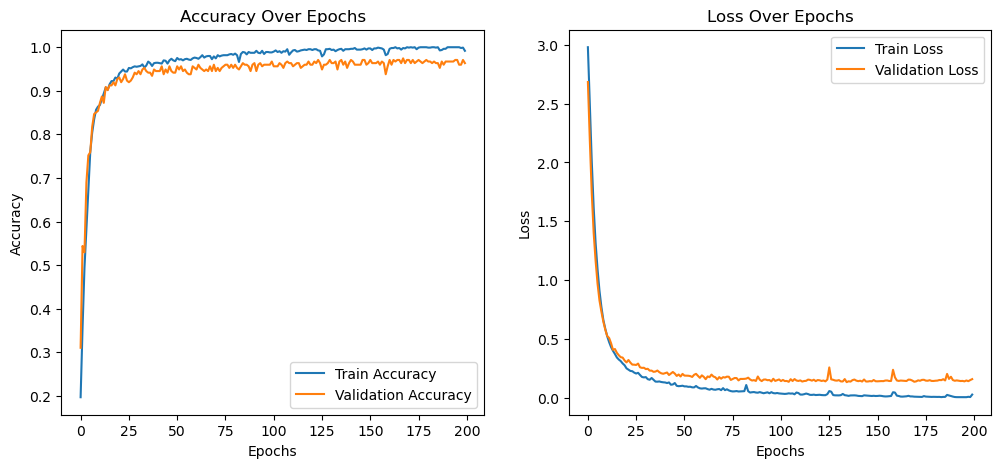

In [15]:
# Step 7: Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
# Step 1: Define Dataset Path
DATA_DIR = r"C:\Users\Nandhini G\gestures_4"
class_labels = ['A', 'B' , 'C' , 'D' , 'E' , 'F', 'G' , 'H' , 'I' , 'J' , 'K', 'L' , 'M' , 'N' , 'O' , 'P', 'Q' , 'R' , 'S' , 'T', 'U' , 'V' , 'W' , 'X', 'Y' , 'Z']  # Update according to dataset
dataset_size = 100  # Adjust if needed

# Step 4: Real-Time Prediction
model = tf.keras.models.load_model('sign_language_mode.keras')

cap = cv2.VideoCapture(0)
labels_dict = {i: lb.classes_[i] for i in range(len(lb.classes_))}
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

while True:
    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()
    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    # Ensure this 'for' loop is at the correct indentation level
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for lm in hand_landmarks.landmark:
                x_.append(lm.x)
                y_.append(lm.y)

            import numpy as np
            data_aux = np.array([])  # Initialize as an empty NumPy array
            for lm in hand_landmarks.landmark:
                data_aux = np.append(data_aux, [lm.x - min(x_), lm.y - min(y_)])


            # Calculate bounding box
            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10
            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            data_aux = np.array(data_aux, dtype='float32').reshape(1, -1, 1, 1, 1)
            prediction = model.predict(data_aux)

            predicted_character = labels_dict[np.argmax(prediction)]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 2)
            cv2.putText(frame, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━